In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./kc_house_data.csv")
n = len(df)


inputs = df.drop(["id","date","zipcode","lat","long","sqft_living15","sqft_lot15"], axis = 1)
targets = inputs[["price","grade"]]
inputs = inputs.drop(["price","grade"],axis= 1)

org_mean, org_std = targets.mean(), targets.std()

targets = targets - targets.mean()
targets = targets/targets.std()

targets.describe()

,price,grade
count,2.161300e+04,2.161300e+04
mean,-3.419074e-17,1.788439e-16
std,1.000000e+00,1.000000e+00
min,-1.266831e+00,-5.663213e+00
25%,-5.941759e-01,-5.588228e-01
50%,-2.453867e-01,-5.588228e-01
75%,2.857643e-01,2.919089e-01
max,1.950254e+01,4.545567e+00


In [21]:
x = inputs[["sqft_living","sqft_lot","sqft_above","sqft_basement","yr_built","yr_renovated"]]

inputs[["sqft_living","sqft_lot","sqft_above","sqft_basement","yr_built","yr_renovated"]] = (x - x.mean())/x.std()

In [22]:
inputs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,-0.979812,-0.228316,1.0,0,0,3,-0.734691,-0.658666,-0.544885,-0.210124
1,3,2.25,0.533622,-0.189881,2.0,0,0,3,0.460830,0.245136,-0.681063,4.746568
2,2,1.00,-1.426221,-0.123296,1.0,0,0,3,-1.229805,-0.658666,-1.293862,-0.210124
3,4,3.00,-0.130547,-0.244009,1.0,0,0,5,-0.891678,1.397483,-0.204441,-0.210124
4,3,2.00,-0.435412,-0.169649,1.0,0,0,3,-0.130892,-0.658666,0.544535,-0.210124
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,-0.598732,-0.337417,3.0,0,0,3,-0.312032,-0.658666,1.293512,-0.210124
21609,4,2.50,0.250534,-0.224381,2.0,0,0,3,0.629894,-0.658666,1.463734,-0.210124
21610,2,0.75,-1.154021,-0.332129,2.0,0,0,3,-0.927906,-0.658666,1.293512,-0.210124
21611,3,2.50,-0.522516,-0.307069,2.0,0,0,3,-0.227500,-0.658666,1.123290,-0.210124


In [23]:

def predict(x, weights, bias):
    pred = np.dot(x, weights.T) + bias

    predictions_df = pd.DataFrame(pred, columns=["price", "grade"])

    return predictions_df


def mean_squared_error(predictions_df, targets):
    se_df = (predictions_df - targets)**2

    mse = se_df.mean()
    
    return mse

In [24]:
def w_gradient(inputs, targets, predictions):
    grads = np.zeros((2,12))
    
    
    for i,y in enumerate(targets.columns):
        for j,X in enumerate(inputs.columns):
        
            grad = (-2*( (targets - predictions)[y] )*inputs[X]).mean()
            grads[i,j] = grad
            
    return grads


def b_gradient(targets, predictions):
    grad = np.zeros((1,2))
    
    for i, y in enumerate(targets.columns):
        grad[0, i] = (-2 * (targets[y] - predictions[y])).mean()
        
    return grad

In [25]:
weights = np.random.normal(size= (2,12))
bias = np.random.normal(size= (1,2))

weights, bias



(array([[ 1.10708883, -0.72297163,  1.32981301,  0.65506097, -0.53126778,
          1.15389943, -0.8956721 , -0.15809382, -1.29391643, -1.08446361,
          1.22223411, -0.31938679],
        [ 0.371858  , -0.07106161, -0.88848   , -0.86740592,  0.15027324,
         -0.92740252,  1.62221522,  0.09368403, -0.58530154,  0.87818489,
          0.70917294, -1.31024405]]),
 array([[-0.29924735,  2.08259951]]))

In [26]:

history = []

In [27]:
lr = 0.001


for i in tqdm(range(10000)):
    
    # make a prediction
    prediction = predict(inputs, weights, bias)
    
    # calculate and print the loss
    loss = mean_squared_error(targets, prediction)
        
    # calculate gradients
    w_grad = w_gradient(inputs, targets, prediction)
    
    b_grad = b_gradient(targets,prediction)
    
    weights = weights - lr * w_grad
    bias = bias - lr * b_grad
    
    history.append({"Price":loss["price"], "Grade":loss["grade"]})
    
    # if (i+1)%100 == 0:
    #     print(loss)
    # update weights and biases using the gradients
    
    
# output the least loss u could get, tweak the learning rate if u want  

100%|██████████| 10000/10000 [07:57<00:00, 20.95it/s]


Text(0.5, 0, 'Epochs')

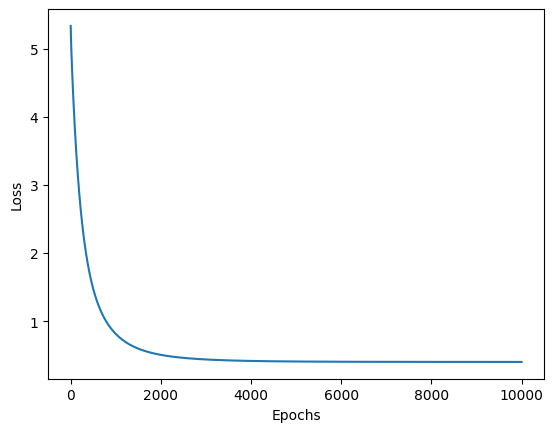

In [28]:
history_df = pd.DataFrame(history)


history_df["Price"].plot(kind="line")
plt.ylabel("Loss")
plt.xlabel("Epochs")

In [29]:
prediction = np.array(inputs.iloc[427])@weights.T + bias

(prediction*[org_std] + [org_mean])[0]

array([5.78130190e+05, 7.86459372e+00])